In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow.parquet as pq

In [3]:
dataset = pd.read_csv("/home/hpc/iwi5/iwi5305h/data/labels.csv", delimiter=';')
print(list(dataset.columns))

['rep_id', 'export_dir', 'export_file', 't_evnt_start', 't_evnt_end', 'sc_type', 'sc_location', 'phase_select', 'fault_target', 'fault_resistance', 'line_1_2_a_length', 'line_1_2_a_xline', 'line_1_2_a_rline', 'line_1_2_a_cline', 'line_1_2_a_xline0', 'line_1_2_a_rline0', 'line_1_2_a_cline0', 'line_1_2_b_length', 'line_1_2_b_xline', 'line_1_2_b_rline', 'line_1_2_b_cline', 'line_1_2_b_xline0', 'line_1_2_b_rline0', 'line_1_2_b_cline0', 'line_2_3_a_length', 'line_2_3_a_xline', 'line_2_3_a_rline', 'line_2_3_a_cline', 'line_2_3_a_xline0', 'line_2_3_a_rline0', 'line_2_3_a_cline0', 'line_2_3_b_length', 'line_2_3_b_xline', 'line_2_3_b_rline', 'line_2_3_b_cline', 'line_2_3_b_xline0', 'line_2_3_b_rline0', 'line_2_3_b_cline0', 'line_2_3_b_on', 'line_1_2_b_on', 'ext_grid_3_on', 'ext_grid_1_u_setp', 'ext_grid_1_phi_setp', 'ext_grid_1_short_circuit_power', 'ext_grid_3_pgini', 'ext_grid_3_qgini', 'ext_grid_3_short_circuit_power', 'load_3_plini', 'load_3_qlini', 'load_2_plini', 'load_2_qlini']


In [4]:
dataset.head(20)

,rep_id,export_dir,export_file,t_evnt_start,t_evnt_end,sc_type,sc_location,phase_select,fault_target,fault_resistance,...,ext_grid_1_u_setp,ext_grid_1_phi_setp,ext_grid_1_short_circuit_power,ext_grid_3_pgini,ext_grid_3_qgini,ext_grid_3_short_circuit_power,load_3_plini,load_3_qlini,load_2_plini,load_2_qlini
0,0,C:\Users\ud75imaj\Desktop\neuro_prot\results/d...,C:\Users\ud75imaj\Desktop\neuro_prot\results/d...,0.258363,0.290138,0,99.947641,0,Line_2_3_b,4.303494,...,0.961530,37.931562,578.213739,18.802122,3.561171,846.889122,21.070184,12.442455,29.575337,-9.833535
1,1,C:\Users\ud75imaj\Desktop\neuro_prot\results/d...,C:\Users\ud75imaj\Desktop\neuro_prot\results/d...,0.467834,0.698350,1,30.387339,1,Line_2_3_a,0.231603,...,0.986969,-96.804366,896.991214,15.974745,-14.684379,730.576455,46.091040,-10.164988,20.506530,-14.514005
2,2,C:\Users\ud75imaj\Desktop\neuro_prot\results/d...,C:\Users\ud75imaj\Desktop\neuro_prot\results/d...,0.291311,0.506453,3,61.346316,0,Line_1_2_b,2.698838,...,0.961228,76.025163,284.392648,-25.226226,13.759447,981.428567,40.674432,-9.956698,47.212688,-3.227486
3,3,C:\Users\ud75imaj\Desktop\neuro_prot\results/d...,C:\Users\ud75imaj\Desktop\neuro_prot\results/d...,0.464287,0.535108,2,77.957304,2,Line_2_3_a,6.907288,...,0.974225,80.268422,533.498276,1.716373,-1.378673,588.985418,29.330999,-15.958389,48.958224,-0.943535
4,4,C:\Users\ud75imaj\Desktop\neuro_prot\results/d...,C:\Users\ud75imaj\Desktop\neuro_prot\results/d...,0.378896,0.401967,3,75.289373,1,Line_1_2_b,0.482257,...,0.990559,-132.357703,753.940934,21.083633,10.080295,779.986634,41.767624,-5.204535,33.455640,9.301952
5,5,C:\Users\ud75imaj\Desktop\neuro_prot\results/d...,C:\Users\ud75imaj\Desktop\neuro_prot\results/d...,0.473582,0.734608,1,29.972734,0,Line_2_3_a,2.831547,...,1.035205,-116.963093,408.279746,-11.271625,-18.641698,887.914855,44.183645,9.563788,21.261696,-0.279227
6,6,C:\Users\ud75imaj\Desktop\neuro_prot\results/d...,C:\Users\ud75imaj\Desktop\neuro_prot\results/d...,0.332861,0.674382,1,99.510919,0,Line_2_3_a,7.158463,...,0.985092,128.773941,991.438804,-18.524526,15.102158,277.057489,34.802389,11.668879,32.206562,-8.973502
7,7,C:\Users\ud75imaj\Desktop\neuro_prot\results/d...,C:\Users\ud75imaj\Desktop\neuro_prot\results/d...,0.228512,0.634591,3,62.272269,0,Line_1_2_b,5.260291,...,0.988006,-60.603743,418.141557,-14.251321,-12.319681,363.364805,39.627980,-13.785277,29.626897,-15.997616
8,8,C:\Users\ud75imaj\Desktop\neuro_prot\results/d...,C:\Users\ud75imaj\Desktop\neuro_prot\results/d...,0.293126,0.635265,1,4.493926,1,Line_1_2_a,5.027199,...,0.975331,157.151976,462.775905,19.063876,0.851979,373.306430,47.163588,1.851224,38.689448,6.933222
9,9,C:\Users\ud75imaj\Desktop\neuro_prot\results/d...,C:\Users\ud75imaj\Desktop\neuro_prot\results/d...,0.421237,0.451397,2,26.067077,0,Line_2_3_b,8.928043,...,0.967533,-74.461758,326.367046,46.419965,13.166164,417.877917,39.833715,-18.944362,25.165348,-8.356533


In [4]:
len(dataset)

1000

In [2]:
df = pd.read_parquet("/home/vault/iwi5/iwi5305h/new_dataset_90kv/all/replica_6609.parquet")

In [3]:
df.columns.tolist()

[('ResultsRepl', 'Zeitpunkt in s'),
 ('Cub_2\\Bus1Ext_Grid_1_ai_exp_ct_vt', 'Sekundärstrom L1 in A'),
 ('Cub_2\\Bus1Ext_Grid_1_ai_exp_ct_vt', 'Sekundärstrom L2 in A'),
 ('Cub_2\\Bus1Ext_Grid_1_ai_exp_ct_vt', 'Sekundärstrom L3 in A'),
 ('Cub_2\\Bus1Ext_Grid_1_ai_exp_ct_vt', 'Sekundärspannung L1 in V'),
 ('Cub_2\\Bus1Ext_Grid_1_ai_exp_ct_vt', 'Sekundärspannung L2 in V'),
 ('Cub_2\\Bus1Ext_Grid_1_ai_exp_ct_vt', 'Sekundärspannung L3 in V'),
 ('Cub_1\\Bus1Line_1_2_a_ai_exp_ct_vt', 'Sekundärstrom L1 in A'),
 ('Cub_1\\Bus1Line_1_2_a_ai_exp_ct_vt', 'Sekundärstrom L2 in A'),
 ('Cub_1\\Bus1Line_1_2_a_ai_exp_ct_vt', 'Sekundärstrom L3 in A'),
 ('Cub_1\\Bus1Line_1_2_a_ai_exp_ct_vt', 'Sekundärspannung L1 in V'),
 ('Cub_1\\Bus1Line_1_2_a_ai_exp_ct_vt', 'Sekundärspannung L2 in V'),
 ('Cub_1\\Bus1Line_1_2_a_ai_exp_ct_vt', 'Sekundärspannung L3 in V'),
 ('Cub_3\\Bus1Line_1_2_b_ai_exp_ct_vt', 'Sekundärstrom L1 in A'),
 ('Cub_3\\Bus1Line_1_2_b_ai_exp_ct_vt', 'Sekundärstrom L2 in A'),
 ('Cub_3\\Bus1Line_1_2

In [5]:
from data_processing import StreamingWindowDataset
from config import PROJECT_ROOT, DATA_PATH
from torch.utils.data import DataLoader
from model import VAE, initialize_weights
import torch

In [2]:
dataset = StreamingWindowDataset(
        pattern=f"{DATA_PATH}/replica_*.parquet",
        sample_rate=7200,
        window_ms=100,
        stride_ms=50,
        feature_min=0.0,
        feature_max=1.0
    )
loader = DataLoader(dataset,
                        batch_size=64,
                        shuffle=True,
                        num_workers=4,
                        pin_memory=True)

In [4]:
seq_len = int(7200 * (100 / 1000.0))
_, n_channels = dataset[0].shape
model = VAE(in_channels=n_channels,
            length=seq_len,
            latent_size=16,
            encoder_out_channels=128)

In [6]:
model.load_state_dict(torch.load("/home/hpc/iwi5/iwi5305h/research_project_PR_labs/best_model.pth"))
model.eval()

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [1]:
import glob
pattern = "/home/vault/iwi5/iwi5305h/new_dataset_90kv/all/replica_*.parquet"

paths = glob.glob(pattern)
print(f"Found {len(paths)} files, e.g.:", paths[:3])

Found 6837 files, e.g.: ['/home/vault/iwi5/iwi5305h/new_dataset_90kv/all/replica_5819.parquet', '/home/vault/iwi5/iwi5305h/new_dataset_90kv/all/replica_5241.parquet', '/home/vault/iwi5/iwi5305h/new_dataset_90kv/all/replica_306.parquet']


In [2]:
import pandas as pd
sample_df = pd.read_parquet(paths[0])
print("Header levels:", sample_df.columns.nlevels)
print(sample_df.columns[:10])

Header levels: 2
MultiIndex([(                      'ResultsRepl',           'Zeitpunkt in s'),
            ('Cub_2\Bus1Ext_Grid_1_ai_exp_ct_vt',    'Sekundärstrom L1 in A'),
            ('Cub_2\Bus1Ext_Grid_1_ai_exp_ct_vt',    'Sekundärstrom L2 in A'),
            ('Cub_2\Bus1Ext_Grid_1_ai_exp_ct_vt',    'Sekundärstrom L3 in A'),
            ('Cub_2\Bus1Ext_Grid_1_ai_exp_ct_vt', 'Sekundärspannung L1 in V'),
            ('Cub_2\Bus1Ext_Grid_1_ai_exp_ct_vt', 'Sekundärspannung L2 in V'),
            ('Cub_2\Bus1Ext_Grid_1_ai_exp_ct_vt', 'Sekundärspannung L3 in V'),
            ('Cub_1\Bus1Line_1_2_a_ai_exp_ct_vt',    'Sekundärstrom L1 in A'),
            ('Cub_1\Bus1Line_1_2_a_ai_exp_ct_vt',    'Sekundärstrom L2 in A'),
            ('Cub_1\Bus1Line_1_2_a_ai_exp_ct_vt',    'Sekundärstrom L3 in A')],
           )


In [3]:
# 3. Select “Cub…Line” columns & find the time column

# Level-0 contains both “Cub_…” and “Line_…”
lvl0 = sample_df.columns.get_level_values(0)

# Keep only those columns whose level-0 string contains both “Cub” and “Line”
keep_cols = sample_df.columns[
    lvl0.str.contains(r"Cub") &
    lvl0.str.contains(r"Line")
]
print("Will keep these Cub…Line columns (level-0 matches):")
for c in keep_cols[:5]:
    print(" ", c)

# Identify the time column by matching level-1 == "Zeitpunkt in s"
time_col = [c for c in sample_df.columns if c[1] == "Zeitpunkt in s"][0]
print("\nTime column is:", time_col)


Will keep these Cub…Line columns (level-0 matches):
  ('Cub_1\\Bus1Line_1_2_a_ai_exp_ct_vt', 'Sekundärstrom L1 in A')
  ('Cub_1\\Bus1Line_1_2_a_ai_exp_ct_vt', 'Sekundärstrom L2 in A')
  ('Cub_1\\Bus1Line_1_2_a_ai_exp_ct_vt', 'Sekundärstrom L3 in A')
  ('Cub_1\\Bus1Line_1_2_a_ai_exp_ct_vt', 'Sekundärspannung L1 in V')
  ('Cub_1\\Bus1Line_1_2_a_ai_exp_ct_vt', 'Sekundärspannung L2 in V')

Time column is: ('ResultsRepl', 'Zeitpunkt in s')


In [5]:
# Work on a copy to avoid mutating sample_df
df = sample_df.copy()

# 1) Drop negative-time rows
print("Before filtering:", len(df), "rows")
df = df[df[time_col] >= 0]
print("After dropping negative times:", len(df), "rows")

# 2) Keep only the Cub…Line columns
df = df.loc[:, keep_cols.tolist()]
print("Filtered shape:", df.shape)
df.head()


Before filtering: 6401 rows
After dropping negative times: 6401 rows
Filtered shape: (6401, 48)


Cub_1\Bus1Line_1_2_a_ai_exp_ct_vt                        \
                Sekundärstrom L1 in A Sekundärstrom L2 in A   
640                        260.227021             73.437148   
641                        248.380698             90.173173   
642                        235.936003            106.691963   
643                        222.922918            122.953722   
644                        209.372792            138.919275   

                                                                             \
    Sekundärstrom L3 in A Sekundärspannung L1 in V Sekundärspannung L2 in V   
640           -333.664170             68539.241511             -4600.327512   
641           -338.553871             66775.666233              -841.781419   
642           -342.627966             64851.222526              2918.792599   
643           -345.876640             62770.546544              6672.334991   
644           -348.292068             60538.650817             10409.803143   

                             Cub_3\Bus1Line_1_2_b_ai_exp_ct_vt  \
    Sekundärspannung L3 in V             Sekundärstrom L1 in A   
640            -63938.913998                        322.202067   
641            -65933.884813                        310.263749   
642            -67770.015125                        297.577979   
643            -69442.881534                        284.175317   
644            -70948.453960                        270.088052   

                                                                          ...  \
    Sekundärstrom L2 in A Sekundärstrom L3 in A Sekundärspannung L1 in V  ...   
640             42.755713           -364.957780             68539.241511  ...   
641             62.170925           -372.434674             66775.666233  ...   
642             81.436361           -379.014340             64851.222526  ...   
643            100.505610           -384.680927             62770.546544  ...   
644            119.332733           -389.420785             60538.650817  ...   

    Cub_1\Bus3Line_2_3_a_ai_exp_ct_vt                           \
                Sekundärstrom L3 in A Sekundärspannung L1 in V   
640                        371.060619             72846.523842   
641                        375.854587             71624.695354   
642                        379.743089             70230.316703   
643                        382.716756             68666.747066   
644                        384.768425             66937.753222   

                                                       \
    Sekundärspannung L2 in V Sekundärspannung L3 in V   
640            -16407.160894            -56439.362946   
641            -12724.827484            -58899.867870   
642             -9011.838850            -61218.477852   
643             -5277.139907            -63389.607161   
644             -1529.727871            -65408.025352   

    Cub_3\Bus3Line_2_3_b_ai_exp_ct_vt                        \
                Sekundärstrom L1 in A Sekundärstrom L2 in A   
640                               0.0                   0.0   
641                               0.0                   0.0   
642                               0.0                   0.0   
643                               0.0                   0.0   
644                               0.0                   0.0   

                                                                             \
    Sekundärstrom L3 in A Sekundärspannung L1 in V Sekundärspannung L2 in V   
640                   0.0             72846.523842            -16407.160894   
641                   0.0             71624.695354            -12724.827484   
642                   0.0             70230.316703             -9011.838850   
643                   0.0             68666.747066             -5277.139907   
644                   0.0             66937.753222             -1529.727871   

                              
    Sekundärspannung L3 in V  
640            -56439.362946  
641            -58899.867

In [2]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

KeyError: 'Sekundärstrom_L1_in_A'

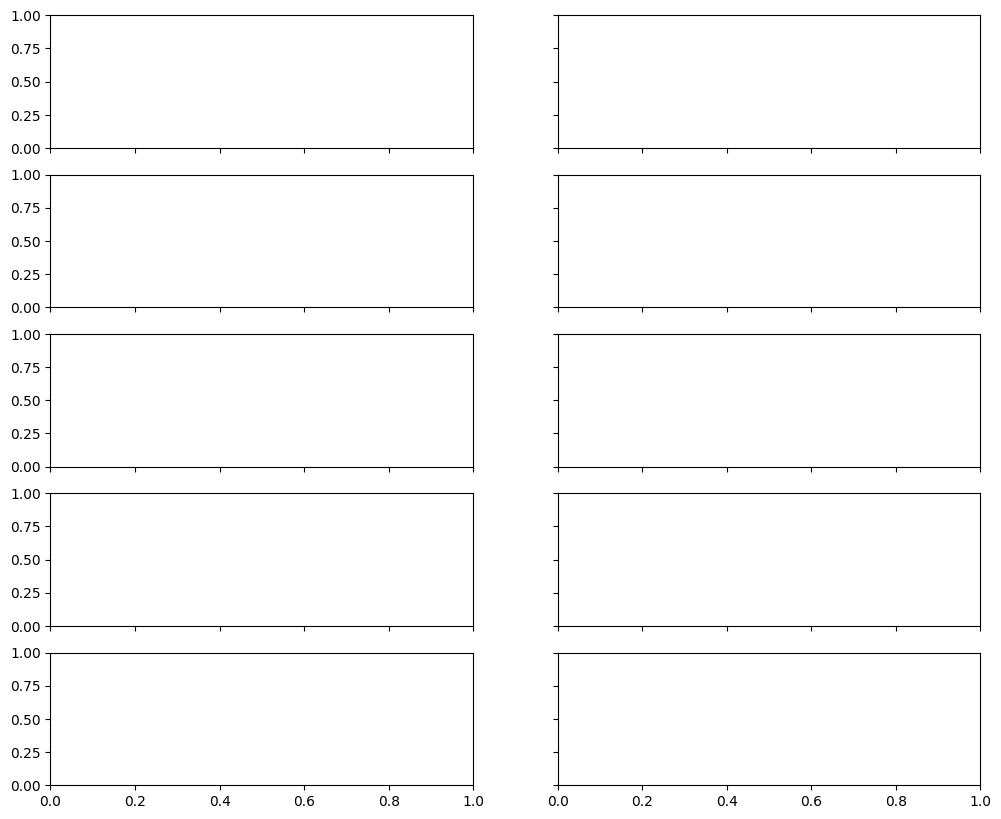

In [5]:
snippet_dir = "/home/vault/iwi5/iwi5305h/fault_snippet"

# 2) Grab the first 10 .parquet files
files = sorted(glob.glob(f"{snippet_dir}/*.parquet"))[:10]

# 3) Make a 5×2 grid of plots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 10), sharex=True, sharey=True)
axes = axes.flatten()

col = 'Sekundärstrom_L1_in_A'
for ax, fn in zip(axes, files):
    df = pd.read_parquet(fn)
    ax.plot(df.index / 7200, df[col], lw=1)
    ax.set_title(Path(fn).stem, fontsize=8)
    ax.set_xticks([]); ax.set_yticks([])

plt.tight_layout()
plt.suptitle("First feature of first 10 fault snippets", y=1.02)
plt.show()

In [7]:
df = pd.read_parquet("/home/vault/iwi5/iwi5305h/fault_snippet/fault_14ms.parquet")
df

,ResultsRepl_Zeitpunkt in s,Cub_2\Bus1Ext_Grid_1_ai_exp_ct_vt_Sekundärstrom L1 in A,Cub_2\Bus1Ext_Grid_1_ai_exp_ct_vt_Sekundärstrom L2 in A,Cub_2\Bus1Ext_Grid_1_ai_exp_ct_vt_Sekundärstrom L3 in A,Cub_2\Bus1Ext_Grid_1_ai_exp_ct_vt_Sekundärspannung L1 in V,Cub_2\Bus1Ext_Grid_1_ai_exp_ct_vt_Sekundärspannung L2 in V,Cub_2\Bus1Ext_Grid_1_ai_exp_ct_vt_Sekundärspannung L3 in V,Cub_1\Bus1Line_1_2_a_ai_exp_ct_vt_Sekundärstrom L1 in A,Cub_1\Bus1Line_1_2_a_ai_exp_ct_vt_Sekundärstrom L2 in A,Cub_1\Bus1Line_1_2_a_ai_exp_ct_vt_Sekundärstrom L3 in A,...,Cub_3\Bus3Line_2_3_b_ai_exp_ct_vt_Sekundärstrom L3 in A,Cub_3\Bus3Line_2_3_b_ai_exp_ct_vt_Sekundärspannung L1 in V,Cub_3\Bus3Line_2_3_b_ai_exp_ct_vt_Sekundärspannung L2 in V,Cub_3\Bus3Line_2_3_b_ai_exp_ct_vt_Sekundärspannung L3 in V,Feld_4\Bus3Load_3_ai_exp_ct_vt_Sekundärstrom L1 in A,Feld_4\Bus3Load_3_ai_exp_ct_vt_Sekundärstrom L2 in A,Feld_4\Bus3Load_3_ai_exp_ct_vt_Sekundärstrom L3 in A,Feld_4\Bus3Load_3_ai_exp_ct_vt_Sekundärspannung L1 in V,Feld_4\Bus3Load_3_ai_exp_ct_vt_Sekundärspannung L2 in V,Feld_4\Bus3Load_3_ai_exp_ct_vt_Sekundärspannung L3 in V
0,0.249687,-424.273539,475.003974,-50.730435,66045.937015,-58827.797289,-7218.139726,424.273539,-475.003974,50.730435,...,0.0,61087.514539,-61773.860621,686.346080,303.650640,-245.245996,-58.404645,61087.514539,-61773.860621,686.346080
1,0.249844,-438.656137,463.849621,-25.193484,67428.443907,-56681.421386,-10747.022522,438.656137,-463.849621,25.193484,...,0.0,62783.381825,-59988.332406,-2795.049421,308.577952,-234.693837,-73.884116,62783.381825,-59988.332406,-2795.049421
2,0.250000,-451.981973,451.577813,0.404160,68648.509773,-54398.494973,-14250.014800,451.981973,-451.577813,-0.404160,...,0.0,64327.998447,-58058.287043,-6269.711402,312.761873,-223.576280,-89.185593,64327.998447,-58058.287043,-6269.711402
3,0.250156,-464.218945,438.218115,26.000831,69703.195366,-51984.517821,-17718.677544,464.218945,-438.218115,-26.000831,...,0.0,65717.643284,-55988.374182,-9729.269100,316.192323,-211.920108,-104.272215,65717.643284,-55988.374182,-9729.269100
4,0.250312,-475.337574,423.802711,51.534863,70589.959855,-49445.305413,-21144.654442,475.337574,-423.802711,-51.534863,...,0.0,66948.968561,-53783.580425,-13165.388138,318.861038,-199.753403,-119.107635,66948.968561,-53783.580425,-13165.388138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,0.416094,-92.730397,-397.788908,442.287107,1564.576825,66256.693472,-65312.850898,92.730397,397.788908,-442.287107,...,0.0,4598.361359,56053.585679,-63544.143065,-19.920602,306.209652,-286.289050,4598.361359,56053.585679,-63544.143065
1066,0.416250,-74.106310,-420.529531,467.233636,-6129.047022,63761.823569,-54400.381015,74.106310,420.529530,-467.233636,...,0.0,15464.400305,72332.304065,-50341.241092,-43.686785,304.275771,-260.588986,15464.400305,72332.304065,-50341.241092
1067,0.416406,-14.874607,-401.828395,513.875364,-4986.565529,69934.704245,-61118.272287,14.874607,401.828394,-513.875364,...,0.0,-1708.265288,60435.317778,-61761.965631,-64.445822,304.510481,-240.064659,-1708.265288,60435.317778,-61761.965631
1068,0.416562,-1.196623,-427.748382,418.122149,-16272.743694,63498.463200,-57162.910905,1.196623,427.748382,-418.122149,...,0.0,-12241.701689,55027.851150,-68913.260407,-63.381968,325.679504,-262.297536,-12241.701689,55027.851150,-68913.260407


In [11]:
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(1)
col_name = df.columns[0]            # e.g. 'Zeitpunkt in s'
first_col_series = df[col_name]     # equivalent to df['Zeitpunkt in s']
first_col_values = first_col_series.values
first_col_values[:10]

array([-0.      ,  0.000156,  0.000312,  0.000469,  0.000625,  0.000781,
        0.000937,  0.001094,  0.00125 ,  0.001406])

Columns after flattening: ['ResultsRepl_Zeitpunkt in s', 'Cub_2\\Bus1Ext_Grid_1_ai_exp_ct_vt_Sekundärstrom L1 in A', 'Cub_2\\Bus1Ext_Grid_1_ai_exp_ct_vt_Sekundärstrom L2 in A', 'Cub_2\\Bus1Ext_Grid_1_ai_exp_ct_vt_Sekundärstrom L3 in A', 'Cub_2\\Bus1Ext_Grid_1_ai_exp_ct_vt_Sekundärspannung L1 in V', 'Cub_2\\Bus1Ext_Grid_1_ai_exp_ct_vt_Sekundärspannung L2 in V', 'Cub_2\\Bus1Ext_Grid_1_ai_exp_ct_vt_Sekundärspannung L3 in V', 'Cub_1\\Bus1Line_1_2_a_ai_exp_ct_vt_Sekundärstrom L1 in A', 'Cub_1\\Bus1Line_1_2_a_ai_exp_ct_vt_Sekundärstrom L2 in A', 'Cub_1\\Bus1Line_1_2_a_ai_exp_ct_vt_Sekundärstrom L3 in A', 'Cub_1\\Bus1Line_1_2_a_ai_exp_ct_vt_Sekundärspannung L1 in V', 'Cub_1\\Bus1Line_1_2_a_ai_exp_ct_vt_Sekundärspannung L2 in V', 'Cub_1\\Bus1Line_1_2_a_ai_exp_ct_vt_Sekundärspannung L3 in V', 'Cub_3\\Bus1Line_1_2_b_ai_exp_ct_vt_Sekundärstrom L1 in A', 'Cub_3\\Bus1Line_1_2_b_ai_exp_ct_vt_Sekundärstrom L2 in A', 'Cub_3\\Bus1Line_1_2_b_ai_exp_ct_vt_Sekundärstrom L3 in A', 'Cub_3\\Bus1Line_1_2_b_ai

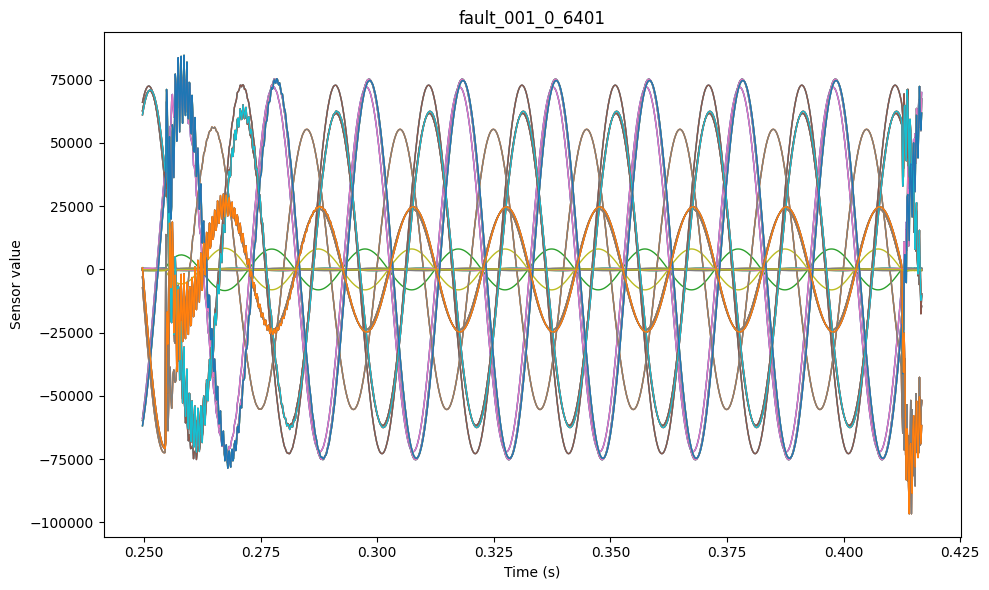

In [6]:
if isinstance(df.columns, pd.MultiIndex):
    # e.g. keep only the second level
    df.columns = df.columns.get_level_values(1)

# Now df.columns should be a single Index:
print("Columns after flattening:", df.columns.tolist())

# Identify time vs. sensor columns
time_col = "ResultsRepl_Zeitpunkt in s"  # or df.columns[0] if that’s the time
sensor_cols = [c for c in df.columns if c != time_col]

# Plot all sensors on one axis
plt.figure(figsize=(10, 6))
for col in sensor_cols:
    plt.plot(df[time_col], df[col], label=col, linewidth=1)

plt.xlabel("Time (s)")
plt.ylabel("Sensor value")
plt.title("fault_001_0_6401")
# plt.legend(ncol=2, fontsize="small", loc="upper right")
plt.tight_layout()
plt.show()

In [1]:
import os, pandas as pd

def make_event_map(labels_csv_path: str):
    df = pd.read_csv(labels_csv_path, sep=";")
    # base name without extension, e.g. "replica_123"
    def base(p): return os.path.splitext(os.path.basename(p.replace("\\", "/")))[0]
    df["base"] = df["filename"].apply(base)
    # dict: "replica_123" -> (start_s, end_s)
    return {row["base"]: (row["t_evnt_start"], row["t_evnt_end"]) for _, row in df.iterrows()}

make_event_map("/home/vault/iwi5/iwi5305h/new_dataset_90kv/labels_for_parquet.csv")


KeyError: 'filename'

In [2]:
import glob, pandas as pd, numpy as np
paths = sorted(glob.glob(f"/home/vault/iwi5/iwi5305h/new_dataset_90kv/all/replica_*.parquet"))[:5]
rates = []
for p in paths:
    df = pd.read_parquet(p)
    lvl1 = df.columns.get_level_values(1)
    time_col = df.columns[lvl1.str.contains("Zeitpunkt", na=False)][0]
    t = df[time_col].to_numpy(dtype=float)
    dt = np.diff(t)
    rates.append(1.0 / np.median(dt))
print("per-file Hz:", [round(r,1) for r in rates], "mean:", round(float(np.mean(rates)),1))

per-file Hz: [np.float64(6410.3), np.float64(6410.3), np.float64(6410.3), np.float64(6410.3), np.float64(6410.3)] mean: 6410.3


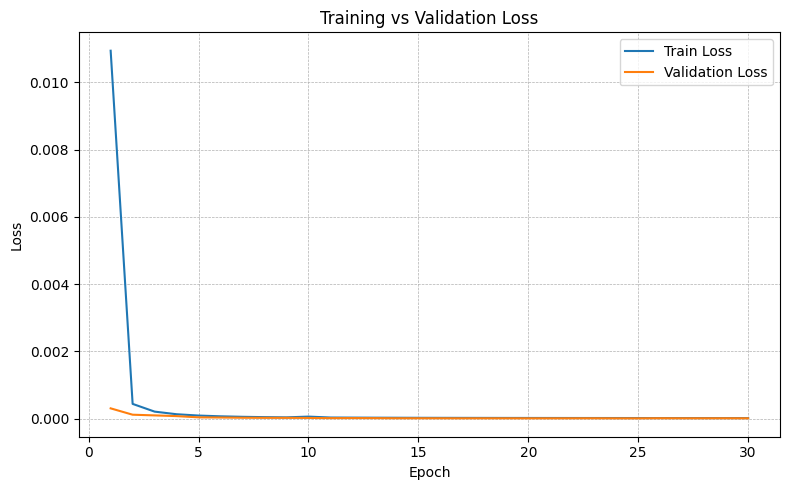

In [1]:
import numpy as np
import matplotlib.pyplot as plt

loss = np.ravel(np.load("/home/hpc/iwi5/iwi5305h/research_project_PR_labs/checkpoints/transformers/train_losses.npy"))
val  = np.ravel(np.load("/home/hpc/iwi5/iwi5305h/research_project_PR_labs/checkpoints/transformers/val_losses.npy"))

plt.figure(figsize=(8,5))
plt.plot(range(1, len(loss)+1), loss, label="Train Loss")
plt.plot(range(1, len(val)+1),  val,  label="Validation Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title("Training vs Validation Loss")
plt.legend(); plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig("loss_validation_plot.png", dpi=200)
plt.savefig("loss_validation_plot.pdf")
plt.show()